In [1]:
import numpy as np
import pandas as pd

df =  pd.read_csv("F:\\IUST\\ترم 2\\داده کاوی\\HW\\HW4\\processed.cleveland.csv", sep=',', header=None,
                  names=['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', 'hd'])

df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [2]:
print(df.ca.mode())
print(df.thal.mode())

df['ca'].replace('?','0',inplace=True)
df['thal'].replace('?','3',inplace=True)

df['cp']=df['cp'].apply(str)
df['restecg']=df['restecg'].apply(str)
df['slope']=df['slope'].apply(str)

df

0    0.0
dtype: object
0    3.0
dtype: object


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    object 
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    object 
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    object 
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 33.3+ KB


In [4]:
#split dataset in features and target variable
feature_cols = ['age', 'sex', 'cp' , 'restbp', 'chol', 'fbs' ,'restecg' ,'thalach', 'exang' ,'oldpeak',
'slope', 'ca', 'thal']
X = df[feature_cols] # Features
y = df.hd # Target variable
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [5]:
X=pd.get_dummies(X)
X

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_3.0,ca_0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,1,0,1,0,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,0,0,0,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,0,0,0,1,0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,1,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,1,0,...,0,0,1,0,0,0,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,0,0,...,0,0,0,0,1,0,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57.0,0.0,130.0,236.0,0.0,174.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [6]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test
X_train

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_3.0,ca_0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3,thal_3.0,thal_6.0,thal_7.0
132,29.0,1.0,130.0,204.0,0.0,202.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,0
202,57.0,1.0,150.0,126.0,1.0,173.0,0.0,0.2,0,0,...,0,0,0,1,0,0,0,0,0,1
196,69.0,1.0,160.0,234.0,1.0,131.0,0.0,0.1,1,0,...,0,0,0,1,0,0,0,1,0,0
75,65.0,0.0,160.0,360.0,0.0,151.0,0.0,0.8,0,0,...,0,0,1,0,0,0,0,1,0,0
176,52.0,1.0,108.0,233.0,1.0,147.0,0.0,0.1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54.0,1.0,192.0,283.0,0.0,195.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,1
71,67.0,1.0,125.0,254.0,1.0,163.0,0.0,0.2,0,0,...,0,0,0,0,1,0,0,0,0,1
106,59.0,1.0,140.0,177.0,0.0,162.0,1.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
270,61.0,1.0,140.0,207.0,0.0,138.0,1.0,1.9,0,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# create a scaler object
scaler = preprocessing.MinMaxScaler()
# fit and transform the data
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns,index=X_train.index)
X_test_norm = pd.DataFrame(scaler.fit_transform(X_test.values), columns=X_test.columns,index=X_test.index)

X_train_norm

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_3.0,ca_0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3,thal_3.0,thal_6.0,thal_7.0
132,0.000000,1.0,0.339623,0.268041,0.0,1.000000,0.0,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.583333,1.0,0.528302,0.000000,1.0,0.778626,0.0,0.032258,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
196,0.833333,1.0,0.622642,0.371134,1.0,0.458015,0.0,0.016129,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
75,0.750000,0.0,0.622642,0.804124,0.0,0.610687,0.0,0.129032,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
176,0.479167,1.0,0.132075,0.367698,1.0,0.580153,0.0,0.016129,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.520833,1.0,0.924528,0.539519,0.0,0.946565,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
71,0.791667,1.0,0.292453,0.439863,1.0,0.702290,0.0,0.032258,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
106,0.625000,1.0,0.433962,0.175258,0.0,0.694656,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
270,0.666667,1.0,0.433962,0.278351,0.0,0.511450,1.0,0.306452,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Build first Tree

In [8]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier( random_state = 42)
# Train Decision Tree Classifer
clf = clf.fit(X_train_norm,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_norm)

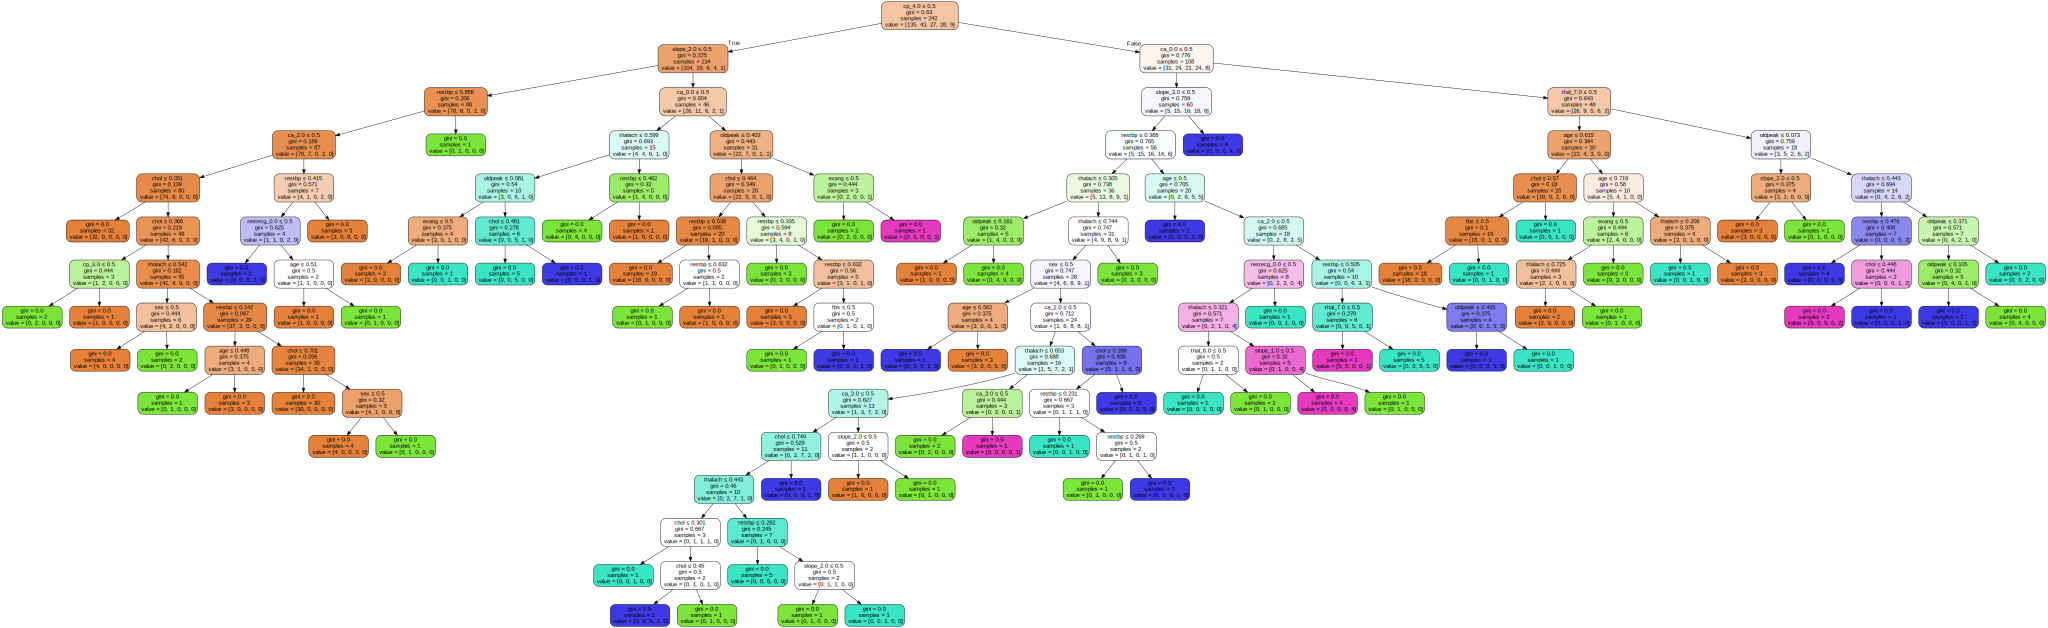

In [9]:
import graphviz
# DOT data

dot_data = tree.export_graphviz(clf, out_file=None,feature_names=X_test_norm.columns,
                               filled=True, rounded=True ,special_characters=True)

# Draw graph

graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph


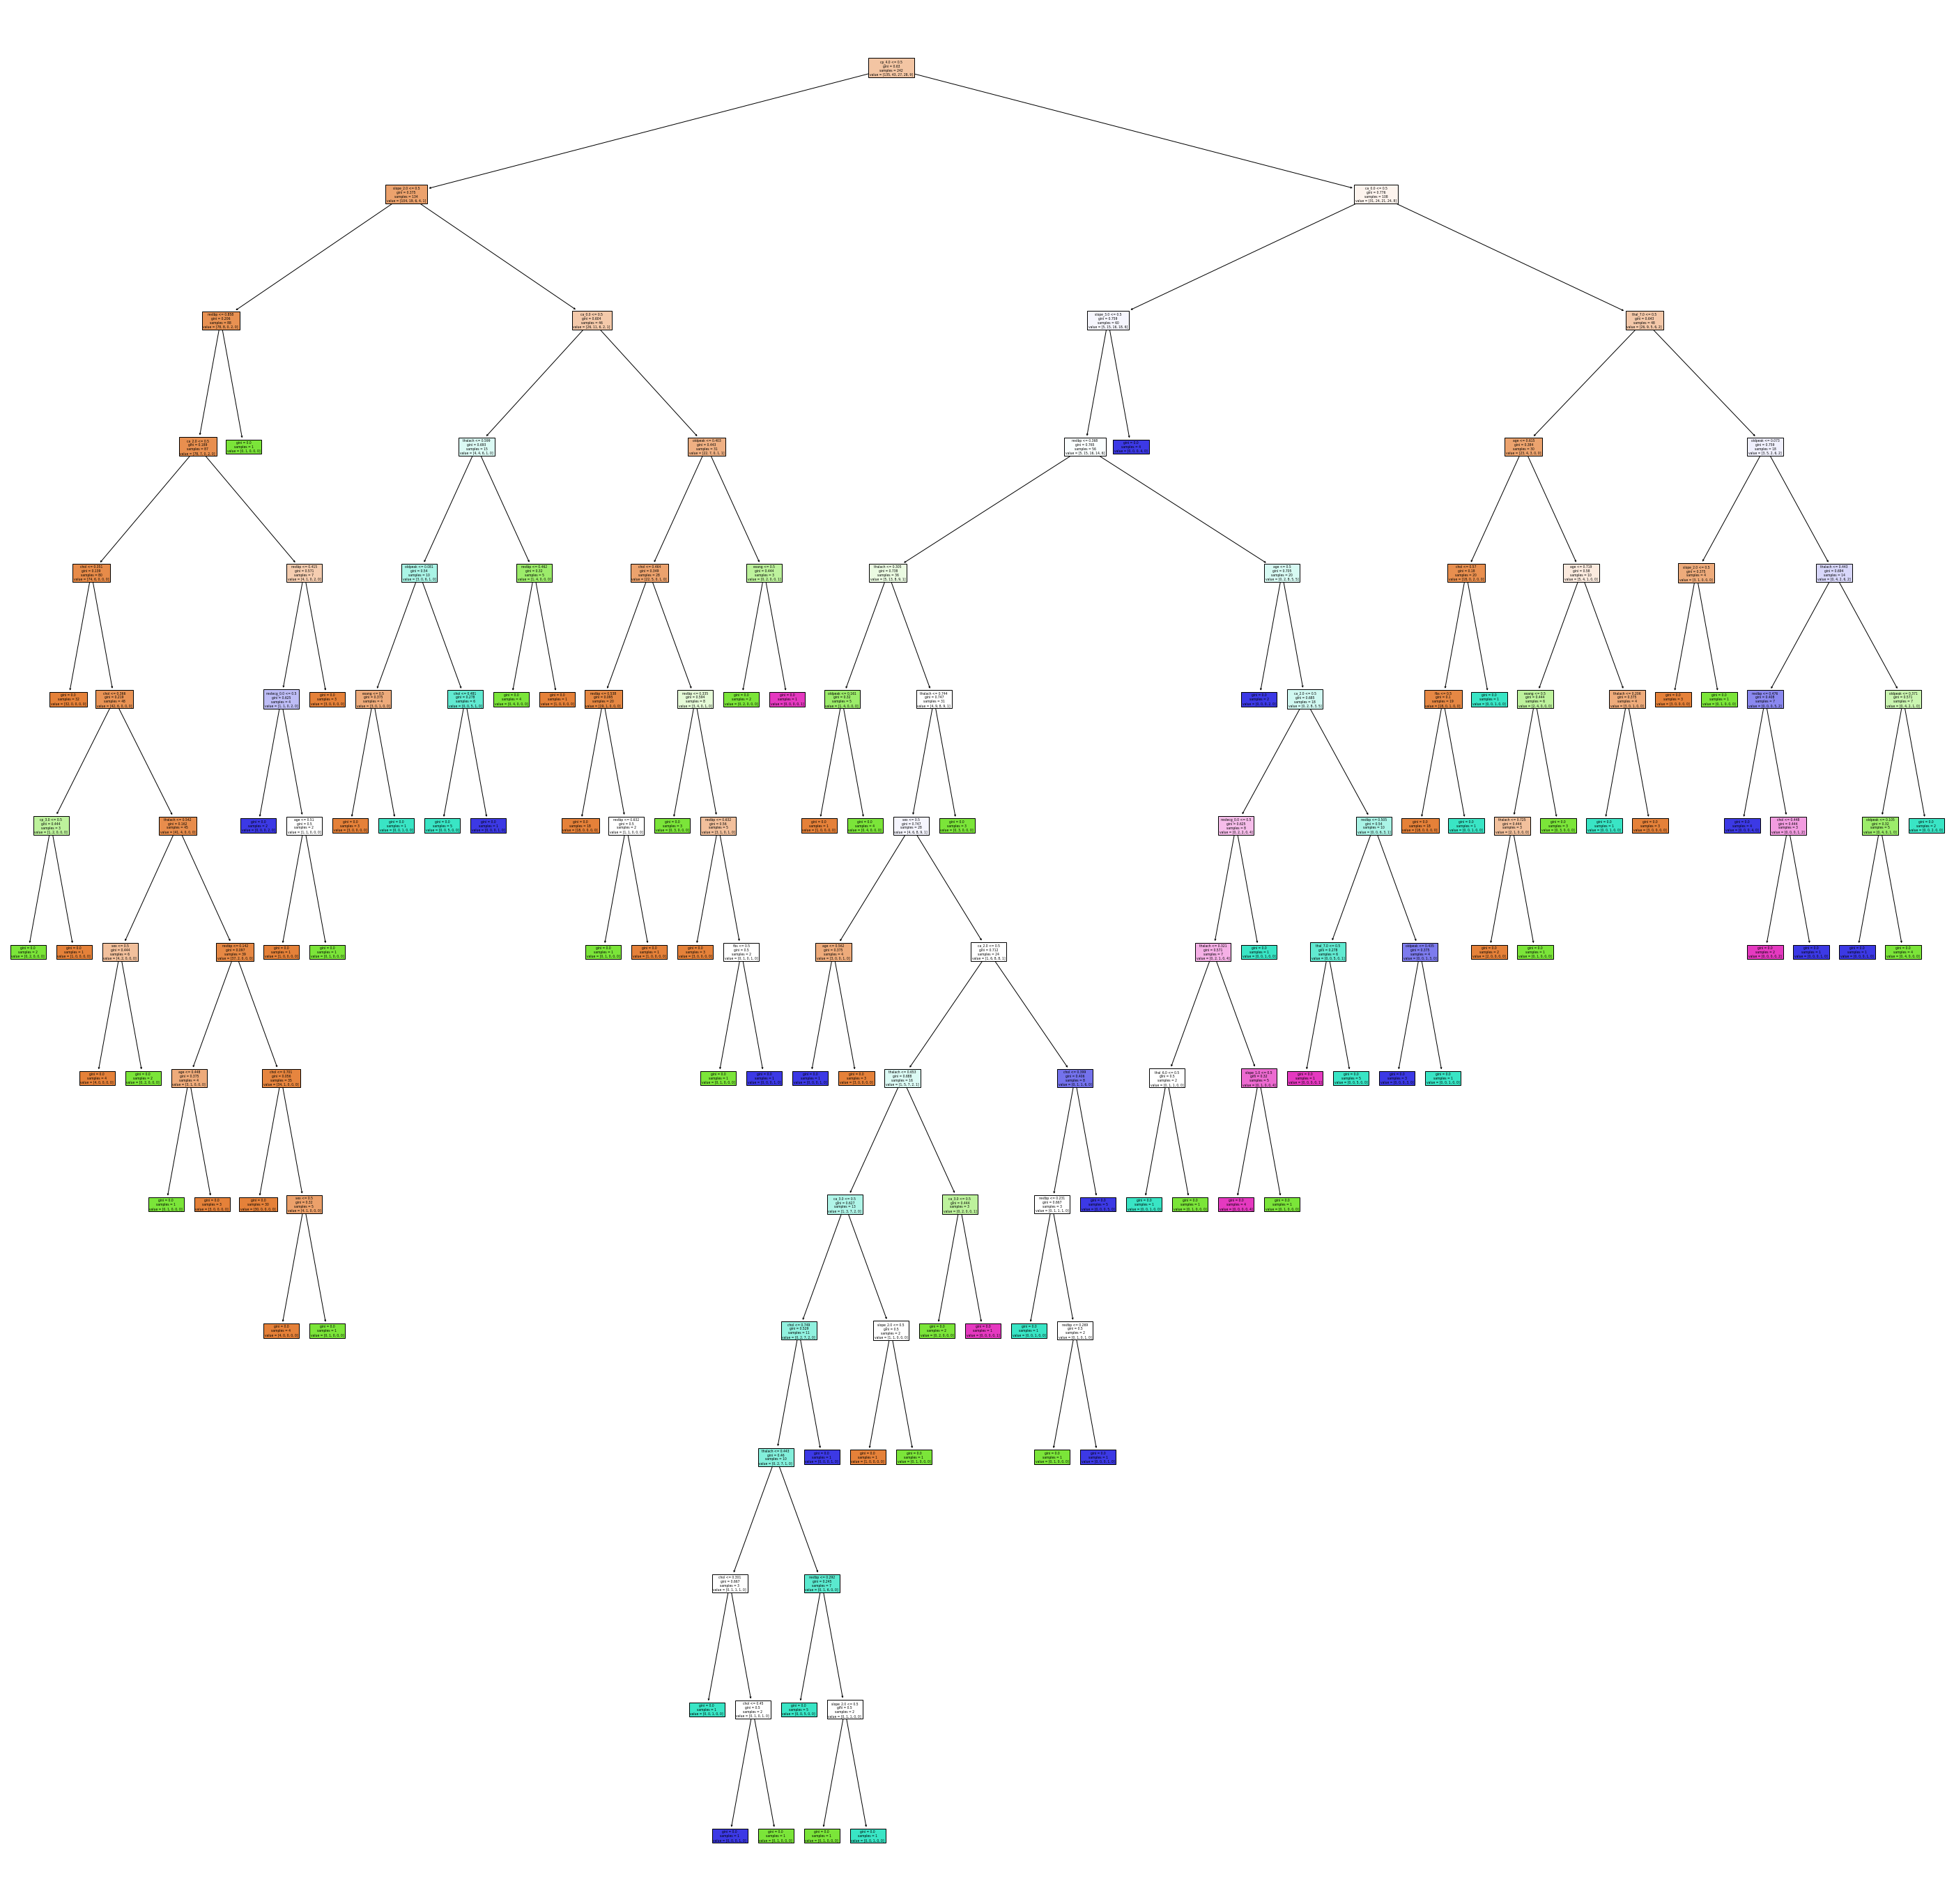

In [13]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf, filled=True,feature_names=X_test_norm.columns)
plt.savefig('Desktop/tree.png')

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.45901639344262296
[[23  6  0  0  0]
 [ 4  2  5  1  0]
 [ 2  2  2  2  1]
 [ 1  3  3  0  0]
 [ 0  1  1  1  1]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.14      0.17      0.15        12
           2       0.18      0.22      0.20         9
           3       0.00      0.00      0.00         7
           4       0.50      0.25      0.33         4

    accuracy                           0.46        61
   macro avg       0.32      0.29      0.29        61
weighted avg       0.45      0.46      0.45        61



# Pruning

[0.         0.00354191 0.00392032 0.00392562 0.00397481 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00503381 0.00516529
 0.00550964 0.00550964 0.00550964 0.00550964 0.00550964 0.00550964
 0.00551927 0.00609892 0.00619835 0.00619835 0.00619835 0.00619835
 0.00619835 0.00625132 0.00629673 0.00661157 0.00661157 0.00661157
 0.00674024 0.00674931 0.00688705 0.00688705 0.00743802 0.00743802
 0.00805785 0.00817264 0.00881543 0.00922865 0.00939787 0.00991736
 0.01097009 0.01134396 0.01189794 0.01404959 0.0150441  0.01785336
 0.02345041 0.03023799 0.07648562]
51


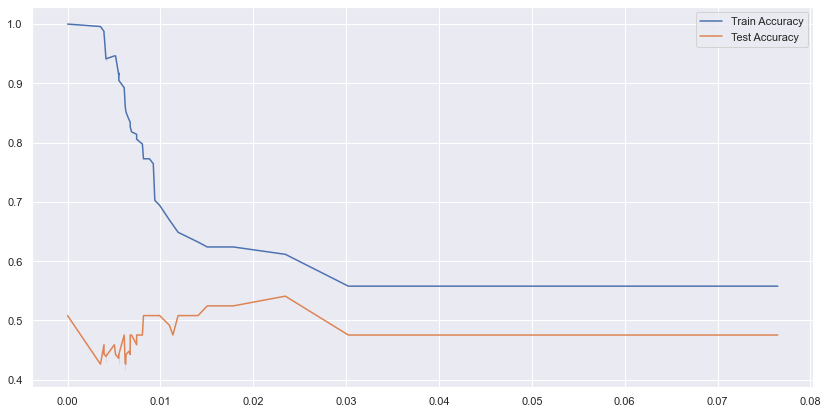

In [11]:
from sklearn.metrics import accuracy_score
import seaborn as sns
path=clf.cost_complexity_pruning_path(X_train_norm , y_train)
alphas=path['ccp_alphas']
print(alphas)
print(len(alphas))

accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train_norm,y_train)
    y_train_pred=tree.predict(X_train_norm)
    y_test_pred=tree.predict(X_test_norm)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
    
sns.set()    
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.show()

#از نمودار می توان یافت که آلفای حدود 0.02 حداکثر دقت تست است

# 5_Fold

[(0.0, 0.49836065573770494), (0.0035419126328217246, 0.5049726775956284), (0.003920322102140283, 0.5148633879781421), (0.003925619834710742, 0.5018032786885247), (0.003974813065722155, 0.5281967213114754), (0.004132231404958678, 0.5480327868852458), (0.004132231404958678, 0.5383060109289617), (0.004132231404958678, 0.5547540983606557), (0.004132231404958678, 0.541584699453552), (0.004132231404958678, 0.5118032786885246), (0.005033809166040574, 0.544808743169399), (0.005165289256198347, 0.5315300546448087), (0.005509641873278236, 0.5215300546448087), (0.005509641873278236, 0.5349726775956285), (0.005509641873278236, 0.5316939890710383), (0.005509641873278236, 0.5349180327868852), (0.005509641873278236, 0.5415300546448087), (0.005509641873278237, 0.5382513661202186), (0.00551927411431543, 0.5182513661202186), (0.006098916757223966, 0.5084153005464481), (0.006198347107438017, 0.5084153005464481), (0.006198347107438017, 0.5182513661202186), (0.006198347107438017, 0.505136612021858), (0.006

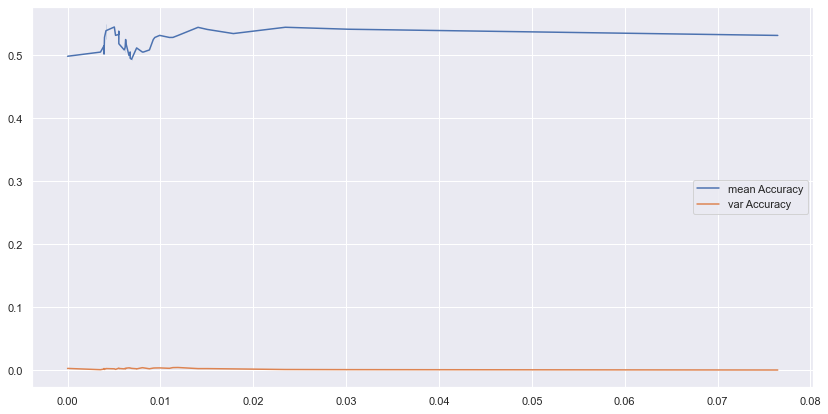

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

mean_accuracy = []
var_accuracy = []
mean = []
var = []
for i in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i)
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=5, scoring='accuracy')
    mean_accuracy.append((scores.mean()))
    var_accuracy.append((scores.var()))
    mean.append((i,scores.mean()))
    var.append((i,scores.var()))

print(mean)
print(var)


sns.set()    
plt.figure(figsize=(14,7))
sns.lineplot(y=mean_accuracy,x=alphas,label="mean Accuracy")
sns.lineplot(y=var_accuracy,x=alphas,label="var Accuracy")
plt.show()

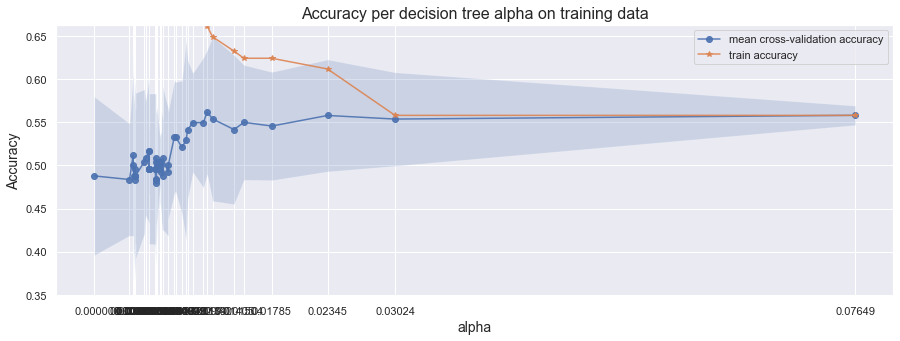

In [16]:
def run_cross_validation_on_trees(X, y, alphas, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for i in alphas:
        tree_model = DecisionTreeClassifier(ccp_alpha=i)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(D, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(D, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(D, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(D, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('alpha', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(D)
    ax.legend()

sm_tree_alphas = alphas
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_alphas)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_alphas, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree alpha on training data')

# Build final Tree

In [29]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(ccp_alpha=0.023450413223140495, random_state = 42)
# Train Decision Tree Classifer
clf2 = clf2.fit(X_train_norm,y_train)

#Predict the response for test dataset
y_test_pred = clf2.predict(X_test_norm)
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  

0.5409836065573771
[[29  0  0  0  0]
 [ 6  0  0  6  0]
 [ 4  0  0  5  0]
 [ 3  0  0  4  0]
 [ 1  0  0  3  0]]


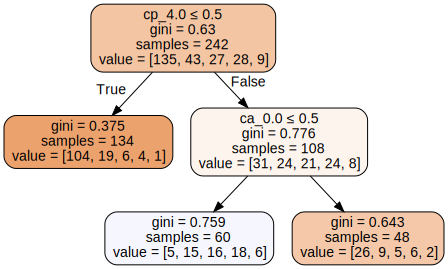

In [30]:
import graphviz

dot2_data = tree.export_graphviz(clf2, out_file=None,feature_names=X_test_norm.columns,
                               filled=True, rounded=True ,special_characters=True)

# Draw graph
graph = graphviz.Source(dot2_data, format="png") 
graph
